# Random Forests

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Model ve Tahmin

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [7]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

# Model Tuning

In [9]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        ~/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" f

RF'in en önemli parametreleri n_estimators yani kullanılacak ağaç sayısı ve bölünmelerde kullanılacak değişken sayısı yani max_features.

Random Forest yapısı itibariyle rastsallığı kendisi sağladığı için max_depth gibi overfittingi engelleyen parametreler anaplanda değil diye düşünebiliriz. Burada CART'ta overfitting engellemede kullandığımız şeyler geri planda kalabilir.

max_features = total feature number olursa bu begging işlemi olur. RF'ın özel bir halidir.

In [11]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [12]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 1) 

In [13]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=1)

In [14]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [15]:
# final model

In [16]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [17]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

#### vurgu

Bütün modellerin en optimum parametrelerini bulduğumuzu düşünelim. Bunlar bulduktan sonra devamında pek bir şey yapılamıyor.

Burada işin koptuğu yer *DEĞİŞKEN MÜHENDİSLİĞİ, VERİ ÖN İŞLEME* gibi basamaklar oluyor.

Değişkenler, birbirleriyle ilişkileri, değişkenlerin bağımlı değişkendeki durumu ayırt edicilik anlamında nasıl etkilediği, keşifçi veri analizinde elde ettiğimiz bulgularla bu değişkenlere bazı muamelerlerde (dönüşüm, değişim) bulunup bulunamayacağımızı mutlaka göz önünde bulundurmalıyız.

#### Değişkenlerin önem düzeylerine nasıl bakıyoruz?

In [18]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

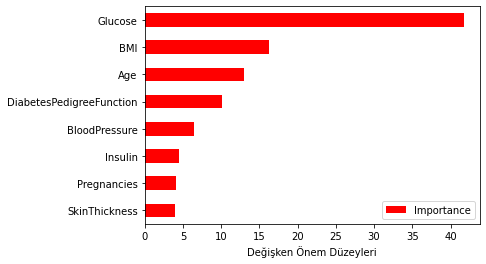

In [19]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

Bir model kurup bunu yüksek tahmin başarısıyla elde etmek *TEKNİK BİR MEZİYET* oluyor. Yani belli adımları var:

1. Parametreleri öğren
2. Üzerinde uzmanlaşıp belli aralıklar ver
3. CV işlemine at ve en iyi parametreleri bulsun.

İşin içine yaratıcılığı (analitik bakış açısını) kaybetmeden, değişkenleri anlamları ve ortaya koyduğu fikirlerle değerlendirme gibi işlemler gerekiyor. Bu demektir ki:

Yaptığımız bu modelde şeker hastalığı olarak tanı koymasını kolaylaştıracak faktörleri bulmuş oluruz. 

Tamam model kurduk ve başarılı, ee? İş dünyasında fark yaratmak istiyorsanız (mesela bir hastanedeki bir veri bilimciyseniz):

Şeker hastalığına sahip olup olmama durumunu modelleme çalışmasını gerçekleştirdikten sonra şöyle bilgiler sunabilmeliyiz:

Biz yaptığımız çalışmalar neticesinde sizin mevcut değerlerinizi incelediğimizde %80 şeker hastasısınız, bizim yapay zeka destek sistemimiz sizin şeker hastalığı ihtimalinizin yüksek olduğunu söylüyor.

Doktor elindeki değişkenlere bakarak hastaya belli yönlendirmelerde bulunduracaktır. Bu da bir destek sistemi olmuş oluyor. 

Buna benzer aksiyona dönebilecek, mevcut süreçleri iyileştirebilecek-iyileştirmeye katkısı olabilecek şekilde bütün modelleme çalışmalarını bütüncül olarak ele almalıyız.

Burada (ML) teknik yetkinliği elde etmek çok kolay-> parametre setini ver, optimum değeri bul.

Biraz daha ileri seviyede:
1. Değişken dönüştürme
2. Yeni değişkenler oluşturma
3. Bunları modele katma
4. Veri önişleme
basamaklarını da göz önünde bulundurduğumuzda biraz daha ilerlemiş oluyoruz.

### Son nokta ise elimizdeki bütün teknik, programlama ve modelleme yeteneklerini gerçek hayata entegre edebilme ve işe yarar şeylere dönüştürebilmek olacaktır.

Mesela yukarıdaki çalışmamız bir hastaneye uyarlanırsa hastanenin kendisini "Yapay zeka destekli tanı koyma" alanında tanıtmasıdir.

### Örnek model

1. Gir rahatsızlıklarını, sonuç: diyabet riski var
2. Gir değerlerini, sonuç: %x diyabet riski var

gibisinden bir iş yükü azaltma ya da destek sistemi oluşturma yapılabilir.
